# COMP47670 - Assignment 1

## Data Preparation and Analysis

In [56]:
import pandas as pd
import numpy as np

### Functions to help utilise Pandas and check the data for null entries

In [57]:
# use a pandas dataframe
def to_pandas_df(file_name):
    data_file = pd.read_csv(file_name)
    # select the relevant columns of data
    data_file = data_file.iloc[:,0:6]
    return data_file

# store date as datetime object to allow for easier time analysis
def to_datetime(date_data):
    date_data = pd.to_datetime(date_data)
    return date_data

# check for null fields
def check_missing_data(data):
    print(data.isnull().sum())
    return

## Dataset 1:  Analyse Data for the last 20 years for the Pacific

In [58]:
twenty_yr_data = to_pandas_df("highMag_data_file.csv")

In [59]:
twenty_yr_data

,date,time,latitude,longitude,depth,mag
0,2020-12-27,21:39:14.770,-39.3398,-74.9849,10.0,6.7
1,2020-12-24,23:43:41.964,13.8200,120.6539,109.0,6.3
2,2020-12-23,18:11:47.762,6.2544,133.6362,11.0,6.1
3,2020-12-20,17:23:22.668,40.8667,142.5814,35.0,6.3
4,2020-12-15,23:21:57.807,5.1789,125.4212,14.0,6.1
...,...,...,...,...,...,...
2284,2001-01-09,16:49:28.000,-14.9280,167.1700,103.0,7.1
2285,2001-01-02,23:17:41.970,-11.1600,162.4400,33.0,6.0
2286,2001-01-02,07:30:03.780,6.7490,126.8090,33.0,6.4
2287,2001-01-01,08:54:31.580,6.6310,126.8990,33.0,6.8


In [60]:
check_missing_data(twenty_yr_data)

date         0
time         0
latitude     0
longitude    0
depth        0
mag          0
dtype: int64


In [61]:
# date string to datetime
twenty_yr_data['date'] = to_datetime(twenty_yr_data['date'])

### Calculate the number of events in each year and the maximum magnitude in each year

In [62]:
# get the current year from the year string
twenty_yr_data['year'] = twenty_yr_data['date'].apply(lambda x: "%d" % (x.year))
# get the number of earthquakes in each year
freq = twenty_yr_data.groupby(['year']).size()
# altered dataframe to reveal the maximum magnitude in each year
max_mag_df = twenty_yr_data.sort_values(['mag', 'latitude', 'longitude']).drop_duplicates(['year'], keep='last')
max_mag_df = max_mag_df.sort_values('year')
# pull the individual years
years = twenty_yr_data['year'].unique()
# array returned by unique() is reversed
years = np.flip(years)

max_mag_df

,date,time,latitude,longitude,depth,mag,year
2236,2001-06-23,20:33:14.130,-16.2650,-73.6410,33.00,8.40,2001
2089,2002-11-03,22:12:41.518,63.5141,-147.4529,4.20,7.90,2002
1997,2003-09-25,19:50:06.360,41.8150,143.9100,27.00,8.16,2003
1844,2004-12-23,14:59:04.410,-49.3120,161.3450,10.00,8.10,2004
1780,2005-09-09,07:26:43.730,-4.5390,153.4740,90.00,7.60,2005
1662,2006-11-15,11:14:13.570,46.5920,153.2660,10.00,8.30,2006
1639,2007-01-13,04:23:21.160,46.2430,154.5240,10.00,8.10,2007
1440,2008-07-05,02:12:04.480,53.8820,152.8860,632.80,7.70,2008
1313,2009-09-29,17:48:10.990,-15.4890,-172.0950,18.00,8.10,2009
1248,2010-02-27,06:34:11.530,-36.1220,-72.8980,22.90,8.80,2010


In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

(0.0, 23.0)

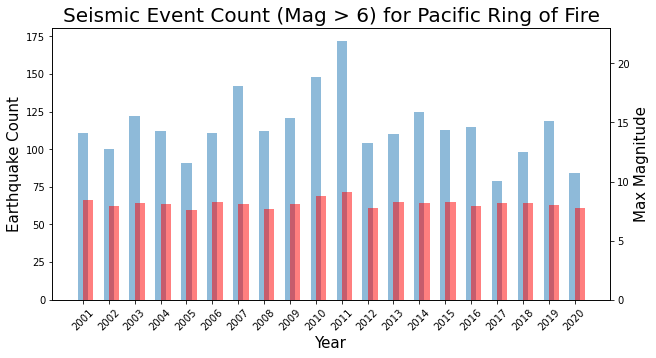

In [80]:
freq_fig, freq_ax = plt.subplots()
plt.rcParams['figure.figsize'] = [10, 5]
fontsize = 15

freq_ax.bar(years, freq, alpha=0.5, width=0.4)
plt.xticks(rotation=45)
freq_ax.set_xlabel("Year", fontsize=fontsize)
freq_ax.set_ylabel("Earthquake Count", fontsize=fontsize)
freq_ax.set_title("Seismic Event Count (Mag > 6) for Pacific Ring of Fire", fontsize = 20)

mag_ax = freq_ax.twinx()
mag_ax.set_ylabel("Max Magnitude", fontsize=fontsize)
mag_ax.bar(max_mag_df['year'], max_mag_df['mag'], color='r', align='edge', alpha=0.5, width=0.4)
mag_ax.set_ylim([0, 23])

The bar chart above shows the yearly data of earthquake count overlayed with the maximum magitude of earthquakes in that year.
- The year of least activity was 2017 and the most active year by far was 2011
- Some spikes in activity can be seen also in 2003 and 2007

2011 also had the highest magnitude earthquake in the last 20 years.
- This was the 9.1 magnitude Tōhoku earthquake and tsunami event which occured on 11 March 2011 and killed nearly 20000 people

#### NOTE
The magitude scale of earthquakes is logarithmic, so each whole number increase represents an amplitude increase of ten times. This is equivalent to a 31.6 times higher energy release.

### Display the locations of eathquakes on a map

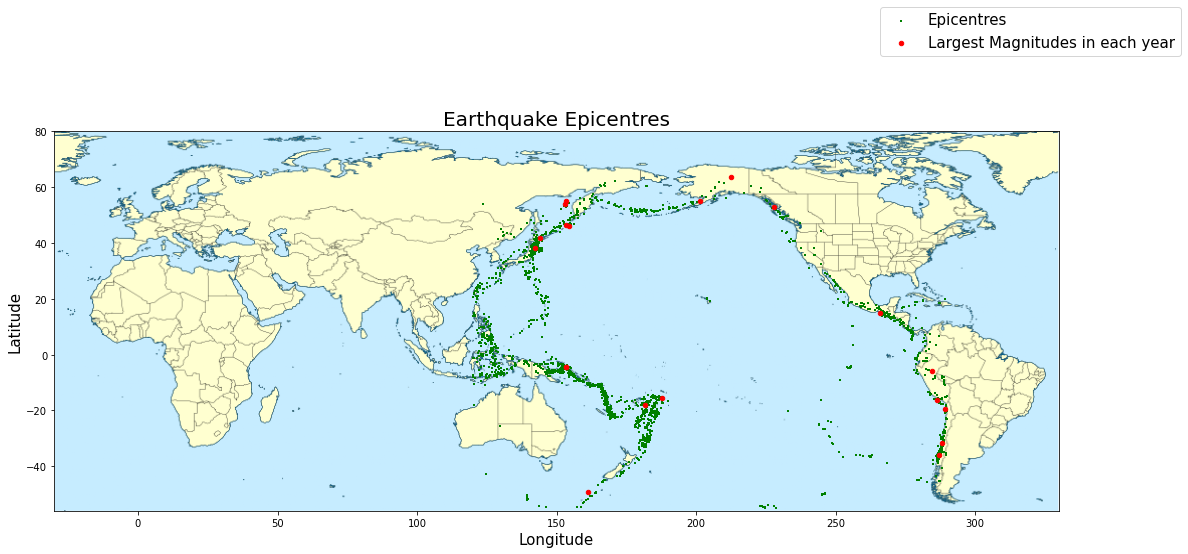

In [67]:
world_map = "World_pacific_map.png"
map_fig = plt.figure()
plt.rcParams['figure.figsize'] = [18, 9]
fontsize = 15

# set up the plot
map_ax = map_fig.add_subplot(111)
map_ax.set_title("Earthquake Epicentres", fontsize=20)
map_ax.set_xlabel("Longitude", fontsize=fontsize)
map_ax.set_ylabel("Latitude", fontsize=fontsize)

# read the image file
im = plt.imread(world_map)
# set the image extent
map1 = map_ax.imshow(im, extent=[-30, 330, -56, 80])
map_ax.set_aspect('equal')

# change the negative longitude values to positive so they fit on the map
def longitude_to_pos(df):
    longitude = np.array(df['longitude'])
    longitude[longitude < 0] += -2*longitude[longitude < 0] + 2*(180 + longitude[longitude < 0])
    return longitude


# longitudes of all data
longitude = longitude_to_pos(twenty_yr_data)
# longitudes of maximum magnitude events
max_mag_long = longitude_to_pos(max_mag_df)


map_ax.scatter(longitude, twenty_yr_data['latitude'], marker='+', s=5, c='g', label = 'Epicentres')
map_ax.scatter(max_mag_long, max_mag_df['latitude'], marker='o', s=20, c='r', label = 'Largest Magnitudes in each year')
map_fig.legend(fontsize=fontsize)

The map above shows the locations of the earthquake epicentres over the last 20 years in the Pacific Ring of Fire.  
The most dense regions are clearly at Japan, The Philippines.

The largest magnitude quakes in each year are also well distributed however clusters are observed in South America and at Japan.

#### NOTE
The reason for the longitude scale not repeating at 180 deg is because a method to repeat the axis after 180 deg could not be found. Therefore the negative longitudes were converted to positive.

## Dataset 2: Analyse Data for the last 50 years for the Pacific

In [68]:
fifty_yr_data = to_pandas_df("long_time_data_file.csv") # read in the 50 year data

In [69]:
fifty_yr_data

,date,time,latitude,longitude,depth,mag
0,2020-12-27,21:39:14.770,-39.3398,-74.9849,10.0,6.7
1,2020-12-24,23:43:41.964,13.8200,120.6539,109.0,6.3
2,2020-12-23,18:11:47.762,6.2544,133.6362,11.0,6.1
3,2020-12-20,17:23:22.668,40.8667,142.5814,35.0,6.3
4,2020-12-15,23:21:57.807,5.1789,125.4212,14.0,6.1
...,...,...,...,...,...,...
5306,1971-01-10,14:29:58.000,-3.3370,139.7570,30.0,6.0
5307,1971-01-10,10:45:07.000,-3.0780,139.6740,30.0,6.6
5308,1971-01-10,07:17:05.000,-3.1840,139.7220,30.0,7.7
5309,1971-01-08,14:45:31.000,47.3410,154.2470,35.0,6.2


In [70]:
check_missing_data(fifty_yr_data) # check for missing data

date         0
time         0
latitude     0
longitude    0
depth        0
mag          0
dtype: int64


### Investigate Epicentre Depth

(array([ 40., 205., 950., 391., 357., 329., 957., 268., 204., 132., 104.,
         87.,  67.,  56.,  50.,  29.,  27.,  28.,  28.,  25.,  35.,  39.,
         38.,  33.,  33.,  29.,  20.,  25.,  24.,  17.,  26.,  16.,  21.,
         16.,  15.,  20.,  12.,  14.,   9.,  19.,  12.,  12.,   8.,   8.,
          8.,   9.,   9.,   2.,   4.,   3.,   4.,   4.,   3.,   7.,   5.,
          1.,   1.,   2.,   4.,   0.,   0.,   0.,   1.,   1.,   1.,   2.,
          4.,   0.,   2.,   3.,   6.,   6.,   3.,   6.,   1.,   4.,   2.,
          7.,   9.,   3.,   3.,   7.,   6.,   7.,   4.,   4.,   6.,   3.,
          7.,   2.,   5.,   3.,   2.,   4.,   6.,   4.,   3.,   5.,   2.,
         10.,   3.,   3.,   8.,   3.,   4.,   6.,   9.,  12.,   6.,   8.,
         11.,   7.,  11.,  13.,   7.,  11.,  13.,  16.,  14.,  15.,  11.,
          7.,   5.,   4.,  13.,   5.,   5.,   3.,   8.,   3.,   0.,   2.,
          1.,   1.,   2.,   3.,   0.,   2.,   0.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  5

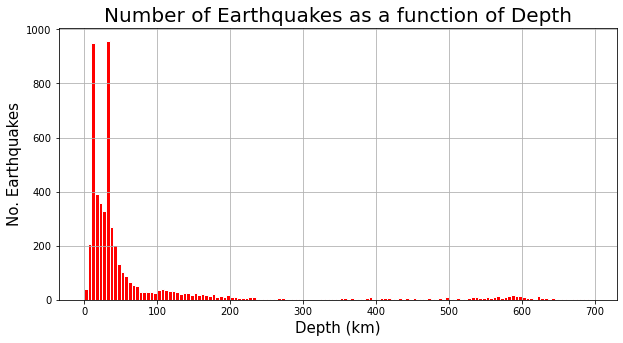

In [72]:

depth_fig, depth_ax = plt.subplots()
plt.rcParams['figure.figsize'] = [10, 5]

fontsize = 15
depth_ax.set_title("Number of Earthquakes as a function of Depth", fontsize=20)
depth_ax.set_xlabel("Depth (km)", fontsize=fontsize)
depth_ax.set_ylabel("No. Earthquakes", fontsize=fontsize)
depth_ax.grid()

bins = np.arange(0, 700, 5) # generate bins for the data
# plot histogram
depth_ax.hist(fifty_yr_data['depth'], bins, color='r', edgecolor='w')

The plot above indicates that the majority of earthquakes occur at lower depths of about 10 - 50 km.  
The depths at which the most earthquake events occur is 10-15km and 30-35km.  
There have been almost no earthquakes occuring at depths between 250 and 350 km over the last 50 years.
 - Research suggests that this drop off can be attributed to weakening of rock materials down to these depths preventing the build up and release of potential energy from seismic activity
 - At depths lower than this, increased pressure strengthens and compacts rock material allowing some more events at lower depths but after about 650 km, temperatures are too high as material behaves more like a fluid
 - See: http://app.earth-observer.org/data/basemaps/images/global/Earthquakes_512/EarthquakesGt5Depths_512/EarthquakesGt5Depths_512.html

## Dataset 3: Ireland data for the last 50 years

In [73]:
ire_data = to_pandas_df("Ireland_data_file.csv")

In [74]:
ire_data

,date,time,latitude,longitude,depth,mag
0,2012-06-06,07:58:13.900,54.151,-10.904,3.0,4.0
1,2005-12-14,03:30:25.500,53.001,-5.641,10.0,3.2
2,1999-10-15,12:38:40.770,52.358,-6.283,10.0,NaN
3,1998-08-31,12:23:14.500,53.028,-5.309,12.6,2.0
4,1993-09-06,02:35:16.000,52.936,-5.695,10.0,NaN
5,1993-07-20,03:48:24.070,52.911,-5.519,10.0,NaN
6,1992-04-28,21:34:05.280,52.939,-6.246,10.0,1.5
7,1988-08-08,02:43:11.880,52.777,-5.632,10.0,NaN
8,1988-08-08,02:33:13.800,52.773,-5.628,10.0,NaN
9,1988-08-07,17:26:30.940,52.791,-5.634,10.0,NaN


We can see that some of the magnitudes are not given so we drop those rows

In [75]:
ire_data = ire_data[ire_data['mag'].notna()]
ire_data

,date,time,latitude,longitude,depth,mag
0,2012-06-06,07:58:13.900,54.151,-10.904,3.0,4.0
1,2005-12-14,03:30:25.500,53.001,-5.641,10.0,3.2
3,1998-08-31,12:23:14.500,53.028,-5.309,12.6,2.0
6,1992-04-28,21:34:05.280,52.939,-6.246,10.0,1.5
11,1986-02-08,09:14:55.250,54.871,-5.296,0.0,2.5
12,1984-05-28,09:05:27.420,52.755,-5.187,10.0,1.9
13,1983-09-11,21:46:28.400,53.423,-6.929,6.9,0.8
14,1982-09-24,16:28:25.790,53.322,-5.661,10.0,1.5


### Display locations on a map

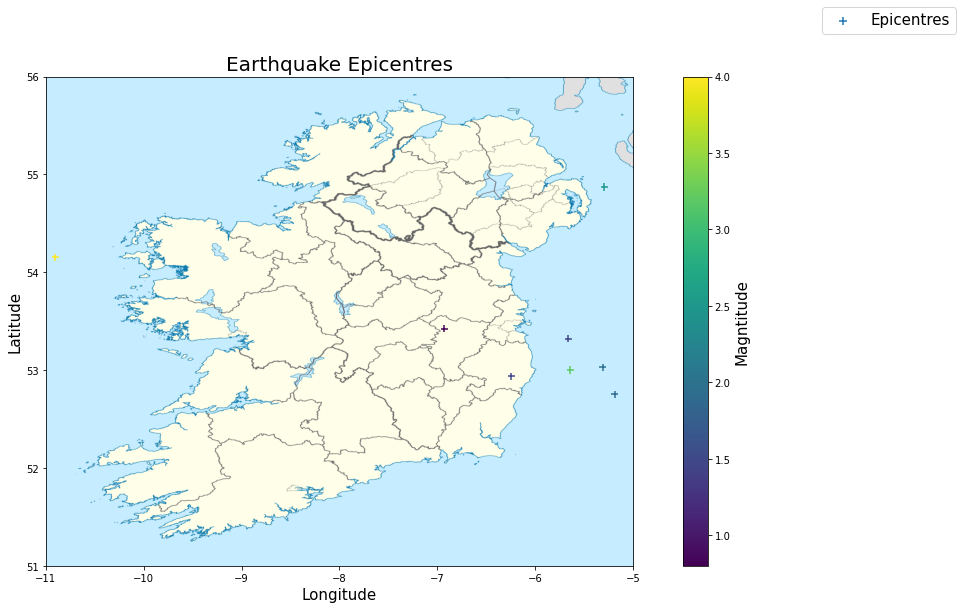

In [77]:
ire_map = "Island_of_Ireland_location_map.png"
ire_fig = plt.figure()
plt.rcParams['figure.figsize'] = [18, 9]
fontsize = 15

# set up the plot
ire_ax = ire_fig.add_subplot(111)
ire_ax.set_title("Earthquake Epicentres", fontsize=20)
ire_ax.set_xlabel("Longitude", fontsize=fontsize)
ire_ax.set_ylabel("Latitude", fontsize=fontsize)

# read the image file
im = plt.imread(ire_map)
# set the image extent
map2 = ire_ax.imshow(im, extent=[-11, -5, 51, 56])
ire_ax.set_aspect('equal')

# plot the epicentres
ire_scatter = ire_ax.scatter(ire_data['longitude'], ire_data['latitude'], marker='+', s=50, c=ire_data['mag'],
                             label = 'Epicentres')
ire_fig.legend(fontsize=fontsize)
plt.colorbar(ire_scatter).set_label(label='Magntitude', size=fontsize)

Ireland has never been known as a particularly active earthquake zone. However some low magnitude seismic events have been recorded over the last 50 years. Unfortunately it seems that more recent events have not been listed in the data provided by this API. A quick google search reveals how many events have been recorded just this year.  
See: https://www.insn.ie/recent-local-earthquakes/  
  
Most of the events occur in the Irish Sea while one occurred in Kildare in 1983 and another in Wicklow in 1992. These were the two lowest magnitude events recorded.  

The largest magnitude (4.0) event took place West of Belmullet in 2012.

## Conclusions

### Dataset
Working with this data set only posed problems when it came to the lack of available data on Ireland. It would have been interesting to investigate more the distribution of seismic events throughout the country and surrounding area. From a little research it is clear that much many more events occurred than are shown on the map. This further analysis could be performed by using data from other sources such as the Irish National Seismic Network to complete the dataset.

### Analysis
It was interesting to see how much more active the year 2011 was for seismic activity in the Pacific region than any other year. Not only did it have by far the highest number of events, but had one of the highest magnitudes ever recorded.  
  
The count of events as a function of depth revealed some interesting information about the effect of Earth's subsurface structure on seismic activity. Factors such as temperature and pressure impact strongly on the state of underlying rock and therefore on earthquake likelyhood.  

A considerable amount of time was spent working with the longitude and latitude data to place the epicentre locations on the map of the world. The longitudes had to be converted to fit on the Pacific centred map. After struggling to do this with Pandas, a numpy array was opted for do to the ease of elementwise operations.